# This notebook provides analysis tools for the Dryland Dynamics model.

### The implementation of the model is in the ``ecosystem/`` folder that includes Python files and a .json files with initial parameters. 

The dryland dynamics model is an agent-based simulation of spatial dynamics of vegetation in arid conditions. The environment is a grid of cells, representing a square piece of land. Each cell can either be degraded {-}, empty (unoccupied) {0} or vegetated {+}. The possible transitions are:

    degraded to empty: {-} to {0}
    empty to degraded: {0} to {-}
    empty to vegetated: {0} to {+}
    vegetated to empty: {+} to {0}
In this notebook some basic properties of the model are studied including density of vegetated states, flowlength, and clustering behaviour.

In [1]:
# Import the model and necessary packages
from ecosystem.model import EcoModel
import pandas as pd
import time


In [2]:
b = 0.4  # establishment probability
m = 0.1  # mortality rate

model = EcoModel(0.4, 0.1, "ecosystem/config_file.json")

num_steps = 50 # number of simulation steps

start_time = time.time()
for i in range(num_steps):
    model.step()
    
print(time.time()-start_time)

28.419665813446045


In [3]:
stats = model.datacollector.get_model_vars_dataframe()
stats

,Degraded,Empty,Vegetated,b,flowlength,qminusminus,qminusplus,qplusplus
0,4106,3893,2001,0.369584,2.043221,0.799735,0.413460,0.199109
1,3710,4234,2056,0.369626,2.040407,0.805220,0.297260,0.247163
2,3561,4270,2169,0.369031,2.080384,0.807485,0.249001,0.304403
3,3453,4318,2229,0.369132,2.073615,0.809591,0.214633,0.336025
4,3455,4194,2351,0.369048,2.079239,0.805214,0.205622,0.366121
5,3375,4187,2438,0.370182,2.003073,0.803491,0.181706,0.390416
6,3352,4159,2489,0.370766,1.963848,0.803999,0.176376,0.408062
7,3346,4080,2574,0.370892,1.955385,0.800004,0.172753,0.422365
8,3278,4055,2667,0.371766,1.896661,0.796843,0.158199,0.440820
9,3286,3946,2768,0.372531,1.845257,0.794144,0.156581,0.461494


# Analysis of vegetation cover, its density and patchiness

In [4]:
from matplotlib import pyplot as plt

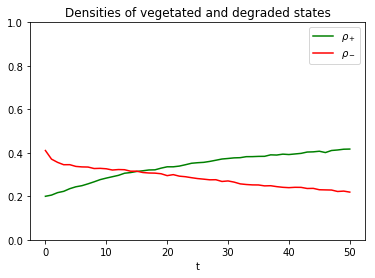

In [7]:
# Plot the global densities at each time step

total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Vegetated/(total), c = 'g',label = r'$\rho_+$')
plt.plot(stats.Degraded/(total), c = 'r', label = r'$\rho_-$')
plt.legend()
plt.xlabel('t')
plt.ylim([0,1])
plt.title("Densities of vegetated and degraded states")
plt.show()

## Plotting indicators of patch formation

   ### q+|+ average probability of having vegetated neighbours next to a vegetated site
   ### q-|+  average probability of having vegetated neighbours next to a degraded site
### c++ indicator of patchiness, i.e. vegetation cover consists of clusters divided by empty or degraded sites

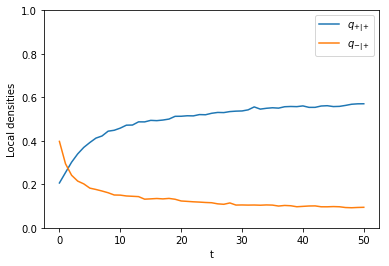

In [6]:
# Plot q+|+ and q-|+
plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.qminusplus, label = r'$q_{-|+}$')
plt.legend()
plt.xlabel('t')
plt.ylim([0,1])
plt.ylabel('Local densities')
plt.show()

/home/sesegma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


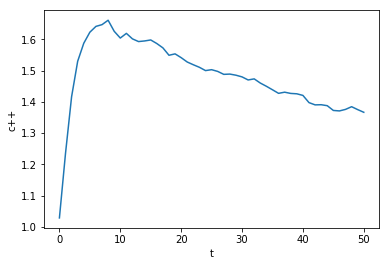

In [7]:
# Plot c++
plt.plot(stats.qplusplus/(stats.Vegetated/(total)))
plt.legend()
plt.ylabel('c++')
plt.xlabel('t')
plt.show()

## Infrequent rainfall simulation

The initial conditions and parameters used are the same as in fig. 3 of the 2013 paper by S. Kefi et al.: m = 0.1, c = 0.3, b = 0.4, d = 0.2, f = 0.8, r = 0, delta = 0. rhoplus = 0.1, rho_min = 0.8

The rain period is 10 steps, drought period is also 10 steps. These and other parameters can be reset in the accompanying .json file

### Run the cell below to gather your own data. Otherwise the data will be read from the files that are supplied 

In [12]:
# Uncomment the following lines to run the model and save the output into your own file
'''
# run model for n steps
n = 400
model_rain = EcoModel(0.4, 0.1, "ecosystem/config_file_rain.json")
# keep track of time
start_time = time.time()
for i in range(n):
    model_rain.step()
    
print("Time simulation took:", time.time()-start_time)


stats = model.datacollector.get_model_vars_dataframe()

#Save into output folder
output_dir = "data/"
stats.to_csv(output_dir+"stats.csv", sep='\t')
'''

Time simulation took: 2.121596574783325


## The following analysis shows how the state of the system depends on rainfall patterns.


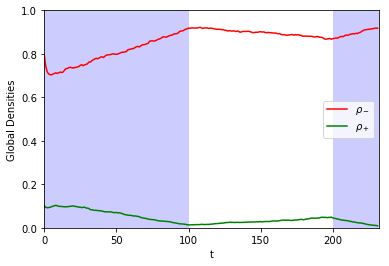

In [13]:
# read from csv's
data_dir = "data/"
period = "100" # also can be 10, 25, 50, or 100
stats = pd.read_csv(data_dir+"stats_"+period+".csv", delimiter='\t')

total = (stats.Degraded+stats.Vegetated+stats.Empty)

# throw away data after density of vegetated sites becomes too low
for i in range(len(stats.Vegetated)):
    if (stats.Vegetated[i] / total[i]) < 0.01:
        stop = i
        break
    else:
        stop = 500
stats = stats[:stop + 1]

# figure with rainfall addition
# plot the global densities at each time step
total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$', c='r')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$', c='g')
plt.legend(loc='center right')
plt.ylabel('Global Densities')
plt.xlabel('t')

# add rainfall color to plot
plt.xlim([0, stop + 1])
plt.ylim([0, 1])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

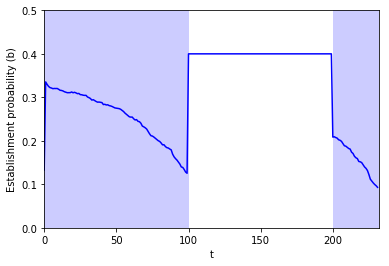

In [6]:
# plotting establishment probability
plt.plot(stats.b, label = 'b', c='b')
plt.ylabel('Establishment probability (b)')
plt.xlabel('t')
plt.xlim([0, stop + 1])
plt.ylim([0, 0.5])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

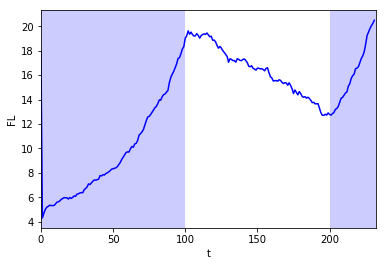

In [7]:
# plotting flowlength
plt.plot(stats.flowlength, label = 'flowlength', c='b')
plt.ylabel('FL')
plt.xlabel('t')
plt.xlim([0, stop + 1])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

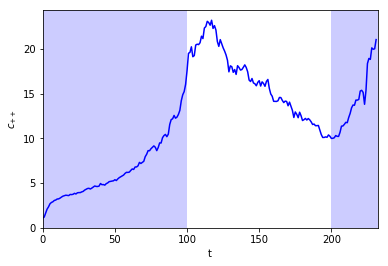

In [8]:
# plotting the clustering index
plt.plot(stats.qplusplus/(stats.Vegetated/(total)), label = r'$c_{++}$', c='b')
plt.xlim([0, stop + 1])
plt.ylabel('$c_{++}$')
plt.xlabel('t')
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()